In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
import csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
tweets = pd.read_csv('tweettest_file.csv')
print(tweets)

        UserName   Timestamp  \
0              1  2021-02-25   
1              2  2021-02-25   
2              3  2021-02-25   
3              4  2021-02-25   
4              5  2021-02-25   
...          ...         ...   
139699      4957  2020-03-03   
139700     18426  2020-03-03   
139701      4524  2020-03-03   
139702      4324  2020-03-03   
139703      1707  2020-03-03   

                                                  Comment  Polarity  \
0       Je weet dat dit van de CDC is, he? Da's dezelf... -0.148333   
1       Dit is pure propaganda! Hoe weet je of hij ech...  0.266667   
2       Wauw.... een verzekering vergelijken met een i...  0.062500   
3       De risico moet duidelijk zijn voor de mensen d...  0.450000   
4       Met meerdere auto-inflammatoire ziekten behoor...  0.279167   
...                                                   ...       ...   
139699  Ik neem het recht te discrimineren, tussen goe... -0.332083   
139700  Hoge politiek\r\n- geen besef van volst

In [2]:
tweets_mean = tweets[['Timestamp', 'Polarity']]
tweets_mean = tweets_mean.groupby('Timestamp', as_index=False).mean()
print(tweets_mean.head())

    Timestamp  Polarity
0  2020-03-03  0.086173
1  2020-03-04  0.035000
2  2020-03-05  0.021157
3  2020-03-06  0.063040
4  2020-03-07  0.029507


<AxesSubplot:title={'center':'Sentiment towards covid-vaccin NL'}, xlabel='Timestamp'>

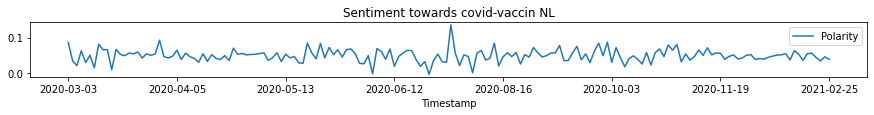

In [3]:
#x = tweets_mean[['Timestamp']]
#y = tweets_mean[['Polarity']]

#plt.plot(x, y)
#plt.show()

tweets_mean.plot('Timestamp', 'Polarity', title='Sentiment towards covid-vaccin NL', figsize=(15, 1))

<AxesSubplot:title={'center':'Number of tweets including keywords over time'}, xlabel='Dates', ylabel='# of tweets'>

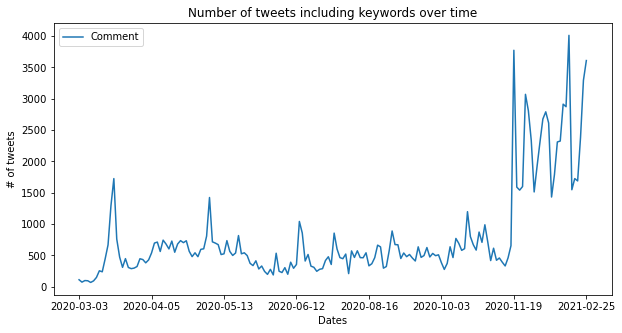

In [4]:
tweets_count = tweets[['Timestamp', 'Comment']]
tweets_count = tweets_count.groupby('Timestamp', as_index=False).count()
tweets_count.plot(x = 'Timestamp', y = 'Comment', xlabel = 'Dates', ylabel = '# of tweets', title = 'Number of tweets including keywords over time', figsize=(10, 5))

In [11]:
tweets_sub = tweets[['Timestamp', 'Subjectivity']]
tweets_sub = tweets_sub.groupby('Timestamp', as_index=False).mean()
print(tweets_sub.head())

    Timestamp  Subjectivity
0  2020-03-03      0.459021
1  2020-03-04      0.472488
2  2020-03-05      0.446773
3  2020-03-06      0.519541
4  2020-03-07      0.449831


<AxesSubplot:title={'center':'Subjectivity in tweets towards covid-vaccin NL'}, xlabel='Timestamp'>

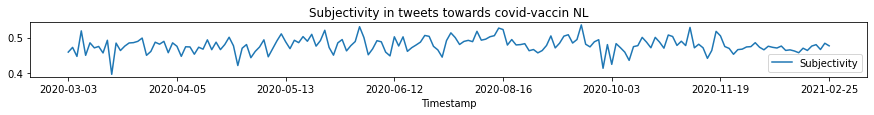

In [12]:
tweets_sub.plot('Timestamp', 'Subjectivity', title='Subjectivity in tweets towards covid-vaccin NL', figsize=(15, 1))

In [31]:
user_count = tweets[['UserName', 'Polarity']]
print(user_count)

        UserName  Polarity
0              1 -0.148333
1              2  0.266667
2              3  0.062500
3              4  0.450000
4              5  0.279167
...          ...       ...
139699      4957 -0.332083
139700     18426 -0.066667
139701      4524 -0.078958
139702      4324  0.000000
139703      1707  0.000000

[139704 rows x 2 columns]


In [53]:
user_c = tweets[['UserName', 'Polarity']]
n = 10
s = user_c['UserName'].value_counts()[:n].index.tolist()
user_count.groupby('UserName', as_index=False)['Polarity'].mean()
user_new = user_count.loc[user_count['UserName'].isin(s)]
print(user_new)

        UserName  Polarity
231          180  0.000000
236          180 -0.100000
268          180 -0.035937
278          216  0.150000
486          180  0.000000
...          ...       ...
139220       407 -0.650000
139247      2219  0.300000
139377      2219 -0.122222
139511       407  0.171875
139590       407  0.230667

[2713 rows x 2 columns]


In [38]:
user_c = tweets[['UserName', 'Polarity']]
n = 10
s = user_c['UserName'].value_counts()[:n].index.tolist()
print(s)

[13158, 419, 180, 216, 2219, 1039, 2763, 1344, 407, 1848]
